In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
#mouse_data.head()
clinical_data = pd.read_csv(clinical_trial_data_to_load)
#clinical_data.head()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_data, clinical_data, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_v = merged_data.groupby(["Drug","Timepoint"]).mean()
#mean_tumor
#Convert to DataFrame
tumor_mean = pd.DataFrame(mean_tumor_v, columns = ["Tumor Volume (mm3)"])

# Preview DataFrame
tumor_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_v = merged_data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
tumor_sem = pd.DataFrame(tumor_sem_v, columns = ["Tumor Volume (mm3)"])
#tumor_sem

# Preview DataFrame
tumor_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames for mean
new_datam = tumor_mean.pivot_table(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# # Preview that Reformatting worked
new_datam.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames for sem
new_datas = tumor_sem.pivot_table(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
new_datas.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


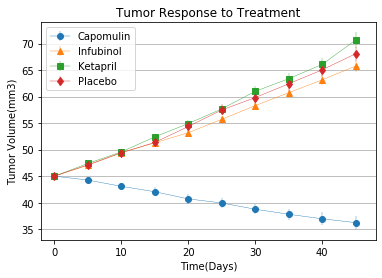

In [6]:
# Generate the Plot (with Error Bars)

# Define variables
x_axis = new_datam.index
columns = ['Capomulin','Infubinol', 'Ketapril','Placebo'] #Looping only 4 columns

#count to give different markers
count = 0
markers = ['o', '^', 's', 'd']

#plot each tumor volume column with error bars
#For loop
for d in columns:
    plt.errorbar(x_axis, 
                 new_datam[d], 
                 yerr = new_datas[d], 
                 linewidth = 0.4,
                 marker =  markers[count]
                ) 
    count += 1 #Iterate to get different markers

plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Response to Treatment")
plt.xlim(-2,48)
plt.ylim(33,74)
plt.grid(axis = "y") #Show horizontal gridlines on the chart
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=10)

plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_v = merged_data.groupby(["Drug","Timepoint"]).mean()
#mean_tumor
#Convert to DataFrame
meta_mean = pd.DataFrame(mean_meta_v, columns=["Metastatic Sites"])

# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem_v = merged_data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem_v, columns=["Metastatic Sites"])
#tumor_sem

# Preview DataFrame
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames for mean
new_metam = meta_mean.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
# # Preview that Reformatting worked
new_metam.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames for sem
new_metas = meta_sem.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
# # Preview that Reformatting worked
new_metas.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


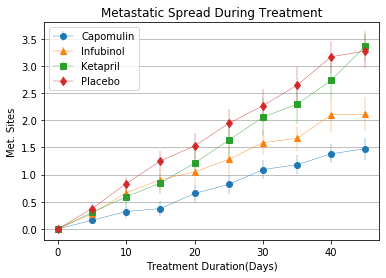

In [11]:
# Generate the Plot (with Error Bars)
# Define variables
x_axis = new_metam.index
columns = ['Capomulin','Infubinol', 'Ketapril','Placebo'] #Looping only 4 columns

#count to give different markers
count = 0
markers = ['o', '^', 's', 'd']

#plot each tumor volume column with error bars
#For loop
for d in columns:
    plt.errorbar(x_axis, 
                 new_metam[d], 
                 yerr = new_metas[d], 
                 linewidth = 0.40,
                 marker =  markers[count]
                ) 
    count += 1 #Iterate to get different markers


plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.xlim(-2,47)
plt.ylim(-0.2,3.8)
plt.grid(axis = "y")
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=10)

plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_v = merged_data.groupby(["Drug","Timepoint"]).count()
#mean_tumor
#Convert to DataFrame
mice_count = pd.DataFrame(count_mice_v, columns=["Mouse ID"])

# Preview DataFrame
mice_count.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
# Minor Data Munging to Re-Format the Data Frames for mice count
new_micem = mice_count.pivot_table(index = "Timepoint", columns = "Drug", values = "Mouse ID")
# # Preview that Reformatting worked
new_micem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


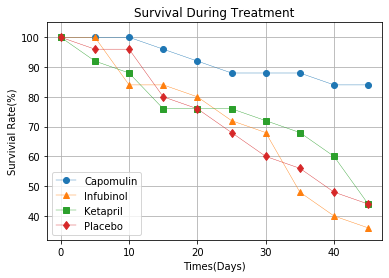

In [14]:
# Generate the Plot (Accounting for percentages)
# Define variables
x_axis = new_micem.index
columns = ['Capomulin','Infubinol', 'Ketapril','Placebo'] #Looping only 4 columns

#count to give different markers
count = 0
markers = ['o', '^', 's', 'd']

#plot survival rate by timepoint
for d in columns:
    y_axis= new_micem[d]/new_micem.loc[0,d]*100 #Mice Count by timepoint divded by inital mice count at timepoint 0
    plt.plot(x_axis, 
            y_axis,
            linewidth = 0.40,
            marker =  markers[count]
            ) 
    count += 1

plt.xlabel("Times(Days)")
plt.ylabel("Survivial Rate(%)")
plt.title("Survival During Treatment")
plt.xlim(-2,47)
plt.ylim(32,105)
plt.grid()
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=10)

plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_change = new_datam[['Capomulin','Infubinol', 'Ketapril','Placebo']]
#tumor_change
percent_change = (tumor_change.iloc[9,:]- tumor_change.iloc[0,:])/tumor_change.iloc[0,:]*100
percent_change


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

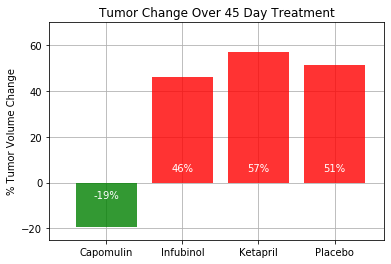

In [16]:
# Store all Relevant Percent Changes into a Tuple
x_axis = np.arange(len(percent_change)) # x-axis count

#plot the bar chart
plt.bar(x_axis, 
        percent_change, 
        color=['r' if percent_change[c] > 0 
               else 
               'g' for c in x_axis], 
        alpha=0.8, 
        align="center",
        zorder=3 #hides the gridlines behind the bar chart
       )

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Infubinol', 'Ketapril','Placebo'])

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.75, len(x_axis)-.35)
plt.ylim(-25,70)
plt.grid()

#If statemtement to get the percent change on the bar
count = 0
for c in percent_change:
    if c > 0:
        placeholder = 5
    else:
        placeholder = -7
    plt.text(count, placeholder, str(round(c)) + '%', color = 'w', horizontalalignment  = 'center')
    count += 1

# Show the Figure
plt.show()